# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
# from config import gkey
import json
from pprint import pprint

import requests
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
#type = numpy.ndarray
lat_lngs = []
#type = list
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)

# CHANGE 1500 TO 20 FOR TESTING PURPOSES

lat_lngs = zip(lats, lngs)
# ^ zip combines lists

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    #cities = list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


81

In [3]:
# print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# USE THIS ONE - url = "https://api.openweathermap.org/data/2.5/weather?"
# city = city in cities
# USE THIS ONE - units = "imperial"

# this one works with 'london' defined
# query_url = url + "q=" + city + "&appid=" + api_key + "&units=" + units

# build partial query api
# USE THIS ONE - query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# query_url = f"{url}appid={api_key}&q={city}"
# q={London}&appid={weather_api_key}"

In [5]:
# # API TEST BLOCK
# city = "London"
# london_test = query_url + city
# response = requests.get(london_test)
# response.json()

In [6]:
# Print the response object to the console
# response = requests.get(query_url)
# type(response)

In [7]:
#Retrieve the data and convert to JSON
# response.json()
# print(json.dumps(response, indent=8))

In [8]:
# city_response = requests.get(query_url)
# city_json = city_response.json()


# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# # weather_response

# temp = weather_json['main']['temp']
# latitude = weather_json['coord']['lat']
# humidity = weather_json['main']['humidity']
# cloudiness = weather_json['clouds']['all']
# wind_spd = weather_json['wind']['speed']


# # Get city id 
# city_id = city_json["id"]
# city_name = city_json["name"]
# print(f"The temp for London is {temp}.")

In [9]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = url + "appid=" + api_key + "&units=" + units + "&q="

In [10]:
#lists for data
city_id = []
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_spd = []
country = []
date_time = []

# loop through the list of cities and make API calls 
# take break for palm to forehead moment


# Counter for calls
counter_city = 1
counter_set = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# for loop 6.2.4 vid 6.2.1
#Exception handling 6.2.8 vid 6.2.2
#loop , scatter plot, df 6.2.3
# counter 6.3.3
#loop through each city
for city in cities:
    #Create search query, make request, store in json
    query = query_url + city
    response = requests.get(query)
    city_data = response.json()
    print(f"Processing Record {counter_city} of Set {counter_set} | {city}")
    #     try to grab the city info and city weather
    try:
        city_id_response = city_data['id']
        city_name_response = city_data['name']
        latitude_response = city_data['coord']['lat']
        longitude_response = city_data['coord']['lon']
        temp_response = city_data['main']['temp_max']
        humidity_response = city_data['main']['humidity']
        cloudiness_response = city_data['clouds']['all']
        wind_spd_response = city_data['wind']['speed']
        country_response = city_data['sys']['country']
        date_response = city_data['dt']
        city_id.append(city_id_response)
        city_name.append(city_name_response)        
        latitude.append(latitude_response)
        longitude.append(longitude_response)
        max_temp.append(temp_response)
        humidity.append(humidity_response)
        cloudiness.append(cloudiness_response)
        wind_spd.append(wind_spd_response)
        country.append(country_response)
        date_time.append(date_response)
#     pprint(city_data)
# print(temp)
    
    except KeyError:
        print("City not found. Skipping...")
#     print(json.dumps(city_data, indent=4, sort_keys=True))
# https://stackoverflow.com/questions/21553327/why-is-except-pass-a-bad-programming-practice
#         print(city_data)
    
    
# !!!!! CHANGE TO 49 AFTER RUNNING TEST BATCHES
    if counter_city < 4:
        counter_city +=1
    else: 
        counter_city = 1
        counter_set +=1
    
    
    

#build query URL based on 
#     response = requests.get(query_url + city).json()
#     lat.append(response['coord']['lat'])
#     temp.append(response['main']['temp'])

# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

# # List for holding lat_lngs and cities
# #type = numpy.ndarray
# city_id = []
# cities = []



# Perform a weather check on each city using a series of successive API calls
#Save config information
# url = "http://api.openweathermap.org/data/2.5/weather?"



# ✓ API Key was imported from
# external script and used as variable - yes 
# ✓ Correctly loops over the list of
# cities
# ✓ No errors interrupt the API call
# loop - exception handling 
# ✓ Prints out the current number
# and name of the city they are
# currently retrieving data for

# response.json()
# print(requests.get(query))

len(city_id)


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | broken hill
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | port macquarie
Processing Record 1 of Set 2 | port alfred
Processing Record 2 of Set 2 | iaciara
Processing Record 3 of Set 2 | avarua
Processing Record 4 of Set 2 | grindavik
Processing Record 1 of Set 3 | aklavik
Processing Record 2 of Set 3 | deputatskiy
Processing Record 3 of Set 3 | gunjur
Processing Record 4 of Set 3 | jamestown
Processing Record 1 of Set 4 | nikolskoye
Processing Record 2 of Set 4 | palafrugell
Processing Record 3 of Set 4 | havelock
Processing Record 4 of Set 4 | ushuaia
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | rikitea
Processing Record 3 of Set 5 | sorland
Processing Record 4 of Set 5 | kawana waters
City not found. Skipping...
Processing Record 1 of Set 6 | carnarvon
Processing Record 2 of Set 6 | severo-kurilsk
Processing Rec

75

In [11]:
# response = requests.get(query).json()
# print(json.dumps(response, indent=4, sort_keys=True))

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | darhan
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | jiuquan
Processing Record 7 of Set 1 | sesheke
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | clarence town
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | magadan
Processing Record 12 of Set 1 | salym
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | arys
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | rio gallegos
Processing Record 22 of Set 1 | kropotkin
Processing Record 23 of Set 1 | but

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#create the data frame
city_df = pd.DataFrame({
    "City": city_name,
#     "City ID": city_id,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date_time,
    "Humidity": humidity,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Wind Speed": wind_spd,
})


city_df.count()

City          75
Cloudiness    75
Country       75
Date          75
Humidity      75
Lat           75
Lng           75
Max Temp      75
Wind Speed    75
dtype: int64

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [13]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Broken Hill,75,AU,1590376810,58,-31.95,141.43,53.60,8.05
1,Kapaa,20,US,1590376533,74,22.08,-159.32,80.60,11.41
2,Busselton,97,AU,1590376810,66,-33.65,115.33,53.01,30.09
3,Port Macquarie,26,AU,1590376810,59,-31.43,152.92,71.01,1.01
4,Port Alfred,65,ZA,1590376811,83,-33.59,26.89,57.99,7.09


In [14]:
#Export to csv
city_df.to_csv("output/CityWeather.csv", index=False, header=True)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

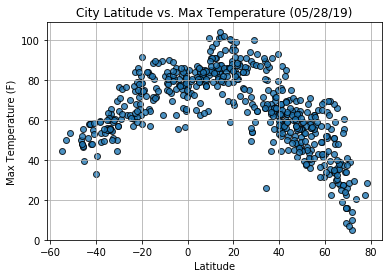

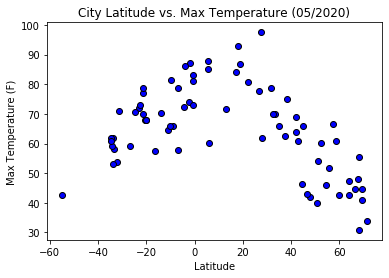

In [15]:
# scatter plots 5.1.12


plt.scatter(latitude, max_temp, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("output/CityLatVsTemp.png")
plt.show()

# !!!!!!------FIND a way to specify size of graph export. Not showing.

In [26]:
# After each plot add a sentence or too explaining what the code is and analyzing.

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

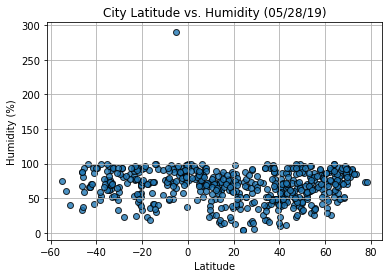

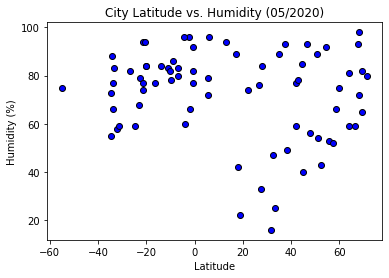

In [16]:
plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity (05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output/CityLatVsHumidity.png")
plt.show()


# !!!!!!------FIND a way to specify size of graph export. Not showing.

In [ ]:
# After each plot add a sentence or too explaining what the code is and analyzing.

#### Latitude vs. Cloudiness Plot

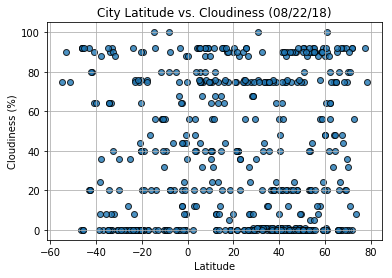

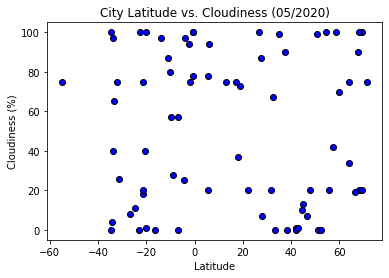

In [17]:
plt.scatter(latitude, cloudiness, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output/CityLatVsCloud.png")
plt.show()
# !!!!!!------FIND a way to specify size of graph export. Not showing.

In [ ]:
# After each plot add a sentence or too explaining what the code is and analyzing.

#### Latitude vs. Wind Speed Plot

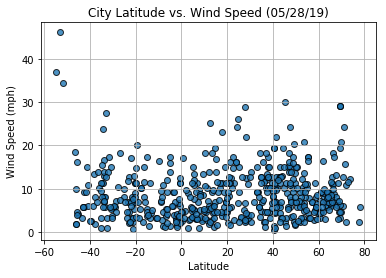

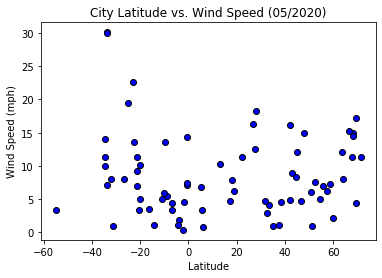

In [18]:
plt.scatter(latitude, wind_spd, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (05/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output/CityLatVsWind.png")
plt.show()

# !!!!!!------FIND a way to specify size of graph export. Not showing.

In [ ]:
# After each plot add a sentence or too explaining what the code is and analyzing.

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [19]:
# Create Northern and Southern Hemisphere DataFrames

north_df = city_df.loc[(city_df["Lat"] >= 0)] 
south_df = city_df.loc[(city_df["Lat"] < 0)] 



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


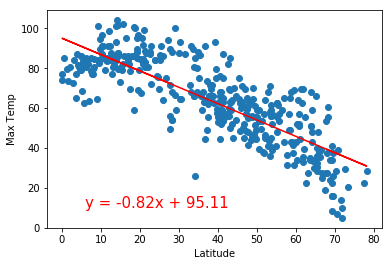

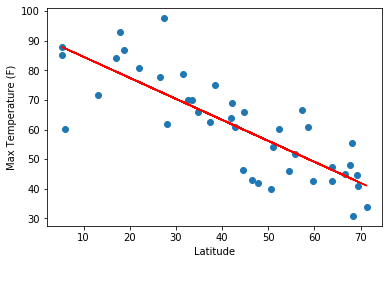

The r-squared value is -0.809853405572424


In [37]:
# # Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# plt.scatter(latitude, max_temp, marker="o", facecolors="blue", edgecolors="black")
# plt.title("City Latitude vs. Max Temperature (05/2020)")
# plt.xlabel("Latitude")
# plt.ylabel("Max Temperature (F)")

# Add the linear regression equation and line to plot 
x_values = north_df['Lat']
y_values = north_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')
# x_values = housing_data['RM']
# y_values = housing_data['MEDV']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


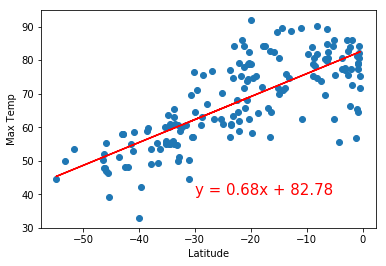

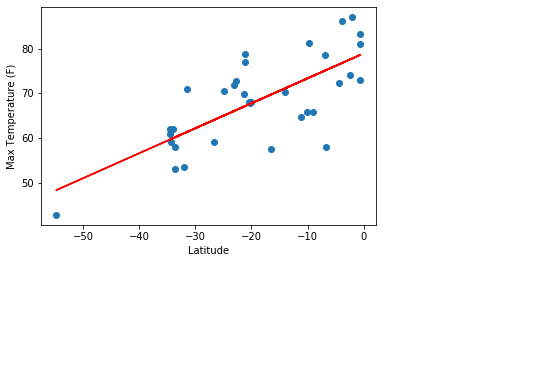

The r-squared value is 0.7295574175418447


In [39]:
x_values = south_df['Lat']
y_values = south_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


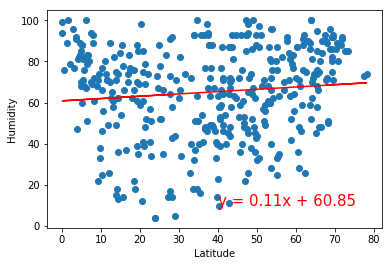

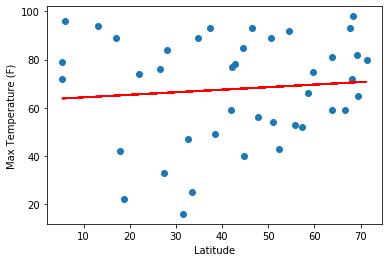

The r-squared value is 0.09381886106942215


In [40]:
x_values = north_df['Lat']
y_values = north_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


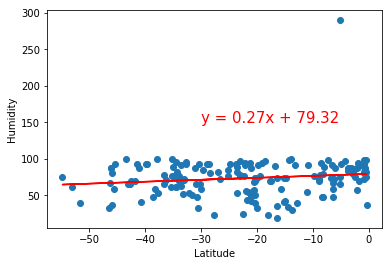

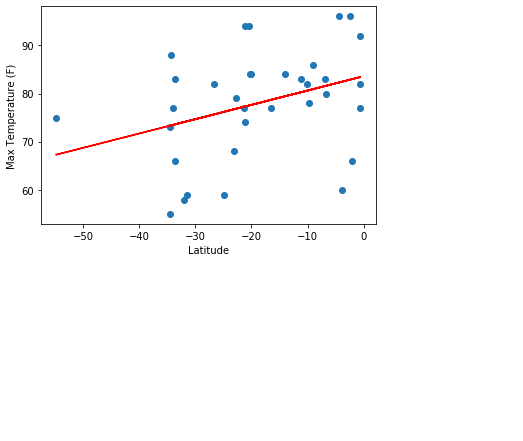

The r-squared value is 0.3501318999058863


In [41]:
x_values = south_df['Lat']
y_values = south_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


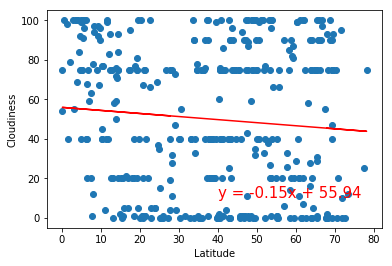

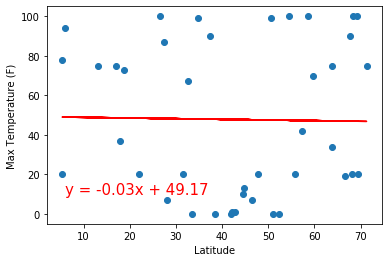

The r-squared value is -0.016808029264070958


In [42]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


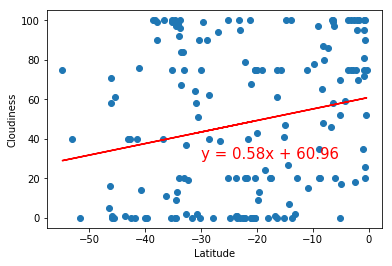

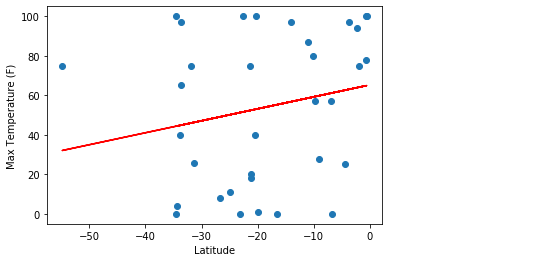

The r-squared value is 0.2102389048301907


In [43]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


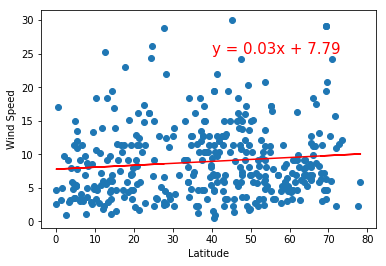

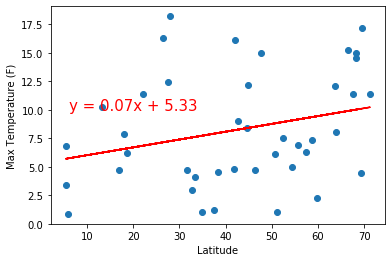

The r-squared value is 0.27097850320498673


In [44]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


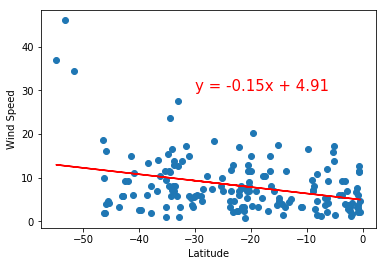

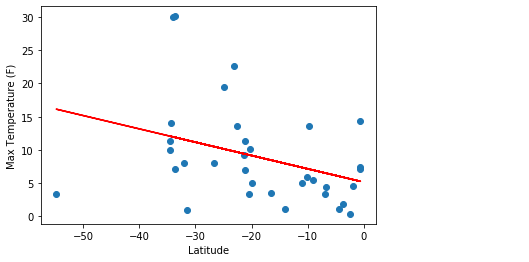

The r-squared value is -0.35532333626323703


In [45]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

print(f'The r-squared value is {rvalue}')